In [159]:
import re
import urllib
import html
from html.parser import HTMLParser
from urllib.parse import urlparse

import re, nltk
from nltk.stem import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

nltk.download('stopwords')
nltk.download('punkt')

import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
import pylab as pl
from pandas import *

from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/notebook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/notebook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 1. Data cleaning

In [160]:
with open('unclassified_tweets.txt',"r") as file1:
        unclassified_tweet_origin=file1.readlines()
        
with open('stop_words.txt',"r") as file2:
        stop_words=file2.readlines()
        
stop_words = [e.strip("\n") for e in stop_words] 


def data_cleaning(tweet_list):
    """
    (list) -> list
    """
        
    unclassified_tweet = tweet_list
    #print(unclassified_tweet)
    
    # remove "\n"
    unclassified_tweet = [e.strip("\n") for e in unclassified_tweet] 
    unclassified_tweet = [x for x in unclassified_tweet if x]
    
    u_t = unclassified_tweet
    
    for i in range(len(u_t)):
        
        tw = u_t[i]
        
        # remove html tags
        cleanr = re.compile('<.*?>')
        tw = re.sub(cleanr, ' ', tw) 
        
        #remove urls
        tw = re.sub('(\s+\S+.[^\s]+/\S+)','',tw)
        tw = re.sub(r'^https?:\/\/.*[\r\n]*', '', tw)
        
        #remove \xa0
        tw = re.sub('\xa0','',tw)
               
        #remove \ufeffl
        tw = re.sub('\ufeff','',tw)
        
        #lowercase characters
        tw = tw.lower()
        
        #remove punctuation and html character codes
        tokenizer = RegexpTokenizer(r'\w+')
        tw = tokenizer.tokenize(tw)
    
        
        #remove stopwords
        cleaned_tweet = list(filter(lambda x: x not in stop_words, tw))
        tw = cleaned_tweet
        u_t[i] = " ".join(tw)
    return u_t
    

In [161]:
cleaned_unclassified = data_cleaning(unclassified_tweet_origin)
print(cleaned_unclassified)

['living dream cameraman camera cameraception camera cameras marriott feet', 'justin trudeau reasons thanksgiving today montreal themoment blog elxn42 poll quebec montreal', 'themadape butt butt allergic latex sneeze nbpoli', '2 massive explosions peace march turkey 30 killed turkey continues implode violence', 'mulcair suggests bad blood ready4change', 'polqc se sort de la marde avec harper prêt à retourner avec trudeau polcan', 'harper 8m help countries wing govt elected cdnpoli elxn42 pnpcbc cbcnews', 'tommy taylor', 'justintrudeau thomasmulcair', 'tracy retweeted tsec', 'icymi lylegreg predicting liberal_party win oct cdnpoli', 'cbc news canada ottawa canada election 2015 ottawa illegal sign removal 1 3267714', 'pjnet', 'cop told sex assault prevention students 2 wear niqab 2 avoid attacks wud feminist supporter outrageous cdnpoli', 'billhillier', 'pls canada keep thug office destroying canadian cdnpoli', 'ready4change ndp', 'guy vows spiral canada huge debt tax butts lead crazy tr

# 2. Exploratory Analysis

## 2.1 Unclassified Tweet Political Affliation

In [162]:
LPC =['justin', 'trudeau', "justintrudeau", "liberal","liberals","realchange","teamtrudeau","lpc","real change",'liberal party','allan thompsen','change'] 
CPC=["harper", "conservative","conservatives","cpc",'stephen', 'steven','pmharper','tpp']
NDP=["ndp","tommulcair","mulcair","ptndp","ready4change",'tom','thomasmulcair']
Green = ['elizabeth may','elizabethmay']

def unique(l):

    """
    (list) -> list
    turn a list into a list with unique elements
    
    """
    result = []
    for i in range(len(l)):
        if l[i] not in result:
            result.append(l[i])
    return result


def party_recognition(tw):

    """
    (str) -> list of str

    takes in single tweet and determines the political party it is related to, if tweet is related to
    multiple parties, all of them will be in the output

    """
    party =[]
    for word in tw.split():
        if word in LPC:
            party.append('LPC')
        if word in CPC:
            party.append('CPC')
        if word in NDP:
            party.append('NDP')
        if word in Green:
            party.append('Green')
    party = unique(party)
    if party == []:
        party.append('no party')
        
    return party


### Distribution of the Political Affliation of  Unclassified Tweets

In [163]:
party_counter = {"LPC":0,"CPC":0,"NDP":0,"Green":0,"no party":0}  
party_affliation =[]
for i in range (len(cleaned_unclassified)):
    party_result = party_recognition(cleaned_unclassified[i])
    party_affliation.append(party_result)
    if 'LPC' in party_result:
        party_counter["LPC"] +=1
    if 'CPC' in party_result:
        party_counter["CPC"] +=1
    if 'NDP' in party_result:
        party_counter["NDP"] +=1
    if 'Green' in party_result:
        party_counter["Green"] +=1
    if 'no party' in party_result:
        party_counter["no party"] +=1

print(party_counter)
         

{'NDP': 476, 'LPC': 815, 'CPC': 694, 'Green': 8, 'no party': 1469}


<IPython.core.display.Javascript object>


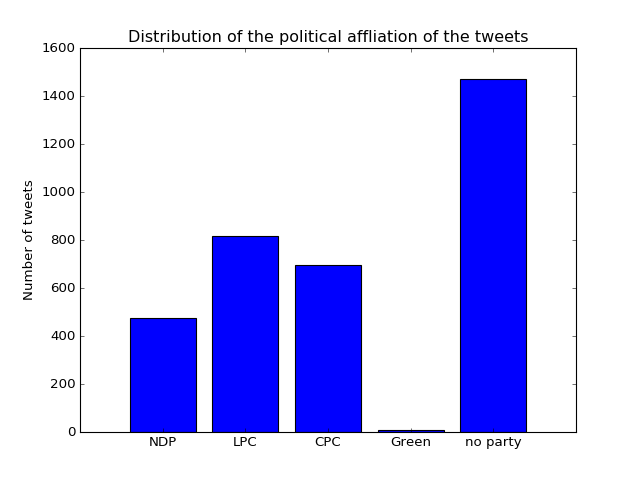

In [164]:
%matplotlib notebook
plot.bar(range(len(party_counter.keys())), party_counter.values(), align="center")

plot.xticks(range(len(party_counter.keys())), party_counter.keys())
plot.ylabel('Number of tweets')
plot.title('Distribution of the political affliation of the tweets')


In the plot above, 'LPC' means liberals party, 'CPC' means conservative party,'NDP' means new democrats party, 'Green' means green party, and 'no party' means the tweet has no political affliation. From the distribution above, Liberals party and Conservative party are the top two parties with most tweets affliated to them. This makes sense since LPC and CPC are the two biggest political party in Canada. Between LPC and CPC, LPC has most tweets related to it. 

## 2.2 Classified Tweet Political Affliation

In [165]:
classified_tweet_df = pd.read_csv('classified_tweets.txt')
classified_tweet_df.head()

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [166]:
classified_tweet_origin = classified_tweet_df['text'].tolist()

{'NDP': 243, 'LPC': 574, 'CPC': 102, 'Green': 1, 'no party': 199082}


<IPython.core.display.Javascript object>


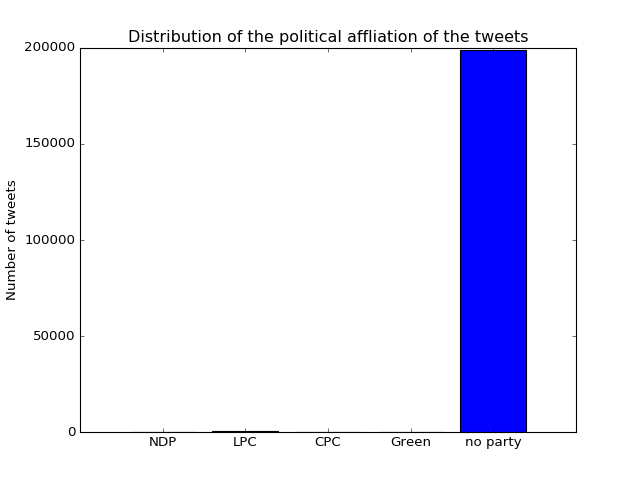

In [167]:

cleaned_classified = data_cleaning(classified_tweet_origin)

cleaned_classified_df = pd.DataFrame(cleaned_classified, columns =['cleaned text'])

classified_tweet_df = pd.concat([classified_tweet_df, cleaned_classified_df], axis=1)

party_counter2 = {"LPC":0,"CPC":0,"NDP":0,"Green":0,"no party":0}  

party_affliation2 =[]

for i in range (len(cleaned_classified)):
    party_result2 = party_recognition(cleaned_classified[i])
    party_affliation2.append(party_result2)
    if 'LPC' in party_result2:
        party_counter2["LPC"] += 1
    if 'CPC' in party_result2:
        party_counter2["CPC"] += 1
    if 'NDP' in party_result2:
        party_counter2["NDP"] += 1
    if 'Green' in party_result2:
        party_counter2["Green"] += 1
    if 'no party' in party_result2:
        party_counter2["no party"] += 1

print(party_counter2)


%matplotlib notebook
plot.bar(range(len(party_counter2.keys())), party_counter2.values(), align="center")

plot.xticks(range(len(party_counter2.keys())), party_counter2.keys())
plot.ylabel('Number of tweets')
plot.title('Distribution of the political affliation of the tweets')

From the plot above, the conclusion is that most of the tweets from classified_tweet.txt is irrelavent to the four political parties in the election. If I go to glance the classified_tweets.txt, most of the contents I read is about people's daily life. This matches the plot.

In [168]:
SE3 = pd.Series(party_affliation2)
classified_tweet_df['party affliation'] = SE3.values

# 3 Model Preparation

In [169]:
corpus_df = pd.read_table('corpus.txt', header=None)
corpus_df.columns = ['word','value']
corpus_df.head()

corpus_dict= dict([(i,a) for i, a in zip(corpus_df.word, corpus_df.value)])


In [170]:
def sentiment_value(tw):
    """
    (str) -> integer
    
    This function takes in a single tweet, gives back its sentiment value, 0 or 1
    score > 0, score = 1
    score <= 0, score = 0
    """
    score = 0
    for word in tw.split():
        if word in corpus_dict.keys():
            score += corpus_dict[word]
            
    if score > 0:
        score = 1
    else:
        score = 0
    return score
        

In [171]:
classified_score_list = []
for i in range(len(cleaned_classified)):
    sentiment_score = sentiment_value(cleaned_classified[i])
    classified_score_list.append(sentiment_score)

se = pd.Series(classified_score_list)
classified_tweet_df['sentiment'] = se.values

In [172]:
def find_feature(data, n):
    '''
    (list, int) -> DataFrame
    
    Takes in a list of tweets and number n, to select top n words with highest frequency, put 
    them into a DataFrame, where each row is each tweet, each column is each top n word's frequency
    '''
    counter = Counter()
    
    for i in range(len(data)):
        counter.update([word for word in re.findall(r'\w+', data[i])])
      
    # select most frequent words           
    top_word = counter.most_common(n)  
    feature_list= []
    
    for j in range(len(data)):
            temp_counter = Counter([word for word in re.findall(r'\w+', data[j])]) 
            # if the word is in the tweet, count frequency, else frequency = 0
            top_in_tweet = [temp_counter[word] if temp_counter[word] > 0 else 0 for (word,wordCount) in top_word]
            # create a list of top n words with highest frequencies
            feature_list.append(top_in_tweet)
               
    feature_df = pd.DataFrame(feature_list)
    header = []
    
    for k in top_word:
        header.append(k[0])
    feature_df.columns = header
    
    return feature_df

classified_feature_df = find_feature(cleaned_classified,100)
classified_feature_df.head()

,t,good,day,work,today,quot,going,love,time,lol,...,damn,keep,things,help,big,bit,omg,missed,sun,thought
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
features_df = classified_feature_df
features = features_df.as_matrix()
target_df = classified_tweet_df['sentiment']
target = target_df.as_matrix()

In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.3)

# 4. Model Training and Implementation

## 4.1 Training Model and Applying to Test Data

In [175]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [176]:
predictions = model.predict(X_test)

### 4.1.1 Accuracy Score

In [177]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,predictions)

print (score*100)

86.0833333333


### 4.1.2 Classification Report

In [178]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      0.97      0.90     37816
          1       0.92      0.68      0.78     22184

avg / total       0.87      0.86      0.86     60000



### 4.1.3 Confusion Matrix

In [179]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test,predictions))

[[36595  1221]
 [ 7129 15055]]


## 4.2 Apply Model to Unclassified Tweets

In [180]:
cleaned_unclassified_df = pd.DataFrame(cleaned_unclassified,columns=['text'])

In [181]:
SE = pd.Series(party_affliation)
cleaned_unclassified_df['party affliation'] = SE.values
cleaned_unclassified_df.head()

,text,party affliation
0,living dream cameraman camera cameraception ca...,[no party]
1,justin trudeau reasons thanksgiving today mont...,[LPC]
2,themadape butt butt allergic latex sneeze nbpoli,[no party]
3,2 massive explosions peace march turkey 30 kil...,[no party]
4,mulcair suggests bad blood ready4change,[NDP]


In [182]:
unclassified_feature_df = find_feature(cleaned_unclassified,100)
unclassified_feature_df.head()

,cdnpoli,elxn42,harper,ndp,retweeted,vote,trudeau,lpc,canada,justintrudeau,...,obama,election2015,government,il,fear,better,won,women,love,doesn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
unclassified_score_list = []
for i in range(len(cleaned_unclassified)):
    sentiment_score = sentiment_value(cleaned_unclassified[i])
    unclassified_score_list.append(sentiment_score)
print(len(unclassified_score_list))

unclass_se = pd.Series(unclassified_score_list)
cleaned_unclassified_df['sentiment'] = unclass_se.values
cleaned_unclassified_df.head()

3079


,text,party affliation,sentiment
0,living dream cameraman camera cameraception ca...,[no party],1
1,justin trudeau reasons thanksgiving today mont...,[LPC],0
2,themadape butt butt allergic latex sneeze nbpoli,[no party],0
3,2 massive explosions peace march turkey 30 kil...,[no party],0
4,mulcair suggests bad blood ready4change,[NDP],0


In [184]:
unclassified_features_df = unclassified_feature_df
unclassified_features = unclassified_features_df.as_matrix()
unclassified_target_df = cleaned_unclassified_df['sentiment']
unclassified_target = unclassified_target_df.as_matrix()

In [185]:
unclassified_predictions = model.predict(unclassified_features)

### 4.2.1 Accuract Score

In [186]:
score2 = accuracy_score(unclassified_target,unclassified_predictions)

print (score2*100)

59.4673595323


### 4.2.2 Classification Report

In [187]:
print(classification_report(unclassified_target,unclassified_predictions))

             precision    recall  f1-score   support

          0       0.83      0.62      0.71      2463
          1       0.25      0.50      0.33       616

avg / total       0.72      0.59      0.63      3079



### 4.2.3 Confusion Matrix

In [188]:
print (confusion_matrix(unclassified_target,unclassified_predictions))

[[1520  943]
 [ 305  311]]


## 4.3 Conclusion

It seems that using top 100 words from classified_tweets.txt as features does not predict very accurate value for targets in unclassified_tweets.txt

# 5. Disscussion

In [189]:
def sentiment_party_count(data):
    """
    (DataFrame) -> Dict, Dict
    
    count the number of positive and negative tweets for each party in given DataFrame
    """
    m,n = data.shape
    positive ={"LPC":0,"CPC":0,"NDP":0}
    negative ={"LPC":0,"CPC":0,"NDP":0}
    
    for i in range(m):
        party_result = data.at[i,'party affliation']
        sentiment = data.at[i,'sentiment']
        if sentiment == 1:
            if 'LPC' in party_result:
                positive["LPC"] +=1
            if 'CPC' in party_result:
                positive["CPC"] +=1
            if 'NDP' in party_result:
                positive["NDP"] +=1
        else:
            if 'LPC' in party_result:
                negative["LPC"] +=1
            if 'CPC' in party_result:
                negative["CPC"] +=1
            if 'NDP' in party_result:
                negative["NDP"] +=1
    return positive, negative


In [190]:
unclassified_pos, unclassified_neg = sentiment_party_count(cleaned_unclassified_df)

## 5.1 Sentiment Distribution in Unclassified Tweets

<IPython.core.display.Javascript object>


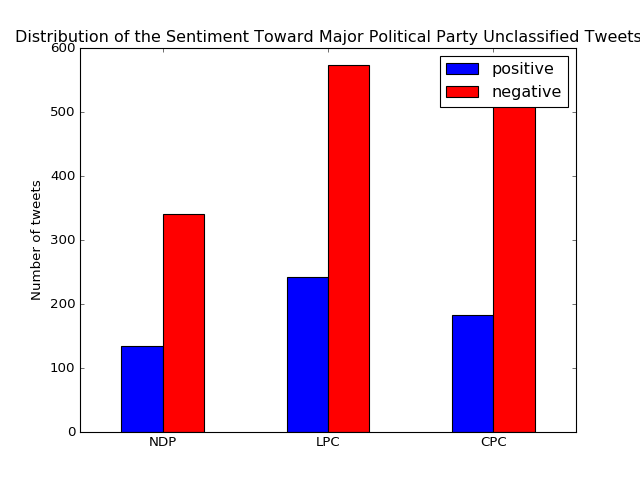

In [191]:
%matplotlib notebook

x = [1.75,3.75,5.75]
width = 0.5
x2 =[2.25, 4.25, 6.25]
fig, ax = plot.subplots()
rects1 = ax.bar(x, unclassified_pos.values(), width, align = 'center',color='b',label = 'positive')
rects2 = ax.bar(x2, unclassified_neg.values(), width, align = 'center', color='r',label = 'negative')

plot.xticks([2,4,6], unclassified_pos.keys())
plot.ylabel('Number of tweets')
plot.title('Distribution of the Sentiment Toward Major Political Party Unclassified Tweets')
plot.legend(handles=[rects1,rects2])

## 5.2 Sentiment Distribution in Classified Tweets

In [192]:
classified_pos, classified_neg = sentiment_party_count(classified_tweet_df)

<IPython.core.display.Javascript object>


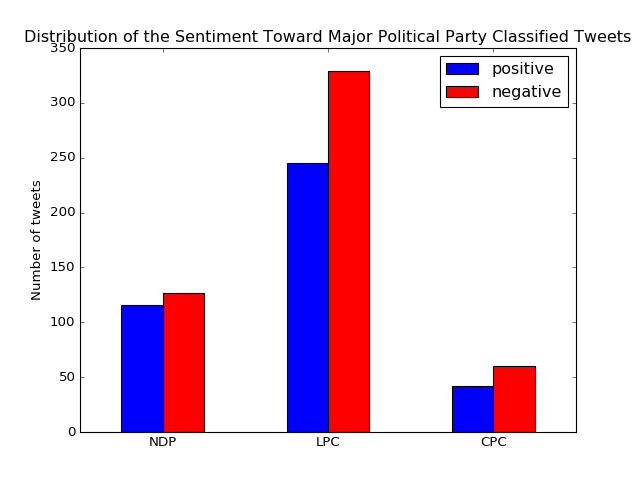

In [193]:
%matplotlib notebook

x = [1.75,3.75,5.75]
width = 0.5
x2 =[2.25, 4.25, 6.25]
fig, ax = plot.subplots()
rects1 = ax.bar(x, classified_pos.values(), width, align = 'center',color='b',label = 'positive')
rects2 = ax.bar(x2, classified_neg.values(), width, align = 'center', color='r',label = 'negative')

plot.xticks([2,4,6], classified_pos.keys())
plot.ylabel('Number of tweets')
plot.title('Distribution of the Sentiment Toward Major Political Party Classified Tweets')
plot.legend(handles=[rects1,rects2])

## 5.3 Conclusion

In conclusion, from the two plots above, in a general view, in unclassified_tweets.txt and classified_tweets.txt people express more negative sentiments than positive sentiments toward each of the three major political parties, with exception of NDP in classified_tweets.txt. However, this does not necessarily give me accurate insights to the election result. As we know, Trudeau from Liberal party won the election, however, the sentiment plots do not show such trend. The possible reasons that the tweet sentiment analysis result do not cope with reality are:

1. Tweeter itself is a biased source, only people who have access to internet can post on it. Also, young people have more tendency to use twitter than old people. So the source can be biased and cannot represent the whole population.

2. Twitter is a historical data, it cannot accurately predict what happends now. For example, a voter can change his favoring party any time after sending the twitter and before voting booth.

3. The method applied here might falsely related a party to a sentiment. For example, one of the tweet is : #mulcair suggests there’s bad blood between him and #trudeau. In this tweet, the publisher does not convey any negative sentiment toward Conservatives and Liberals. However, the algorithm I used in this assignment will likely consider this tweet have negative sentiment toward both Conservatives and Liberals.

4. The sample size might not be large enough to accurately represent the population.

5. People in dissatisfaction may have more tendency to show their sentiment comparing to people in satisfaction.

6. Some of the tweets are in French, but the corpus I used was in English. So there's some error there when determining the attributes of a French tweet.